In [240]:
# === 1. Data Collection ===
# Census API pull
# HCAI discharge data load

# === 2. Data Cleaning ===
# ZIP formatting
# Missing value handling
# Per capita calculations

# === 3. County-Level Outcome Model ===
# Mortality regression

# === 4. ZIP-Level Access Model (LA) ===
# Facility density regression

# === 5. Conclusion ===


In [241]:
# 1) Make sure zcta is a 5-digit string in BOTH tables
acs["zcta"] = acs["zcta"].astype(str).str.zfill(5)
facility_counts["zcta"] = facility_counts["zcta"].astype(str).str.zfill(5)

# 2) Merge facility counts + ACS (poverty/income)
final = facility_counts.merge(
    acs[["zcta", "poverty_pct", "median_income"]],
    on="zcta",
    how="left"
)

# 3) Quick check
print(final.shape)
final.head()


(268, 4)


,zcta,facility_count,poverty_pct,median_income
0,90001,5,21.206320,57698
1,90002,3,24.143420,54221
2,90003,5,27.063850,51275
3,90004,12,19.336932,58420
4,90005,8,23.806469,49226


In [242]:
final.isna().mean().sort_values(ascending=False).head(10)


poverty_pct       0.003731
zcta              0.000000
facility_count    0.000000
median_income     0.000000
dtype: float64

In [243]:
import pandas as pd

income_file = "ACSST1Y2024.S1701-2026-02-06T061430.csv"
poverty_file = "ACSST1Y2024.S1901-2026-02-06T061512.csv"
facilities_file = "Licensed_and_Certified_Healthcare_Facilities.csv"

income = pd.read_csv(income_file)
poverty = pd.read_csv(poverty_file)
facilities = pd.read_csv(facilities_file)

print("income shape:", income.shape)
print("poverty shape:", poverty.shape)
print("facilities shape:", facilities.shape)

display(income.head())
display(poverty.head())
display(facilities.head())


income shape: (69, 7)
poverty shape: (17, 9)
facilities shape: (15743, 62)


,Label (Grouping),"Los Angeles County, California!!Total!!Estimate","Los Angeles County, California!!Total!!Margin of Error","Los Angeles County, California!!Below poverty level!!Estimate","Los Angeles County, California!!Below poverty level!!Margin of Error","Los Angeles County, California!!Percent below poverty level!!Estimate","Los Angeles County, California!!Percent below poverty level!!Margin of Error"
0,Population for whom poverty status is determined,"9,600,775","±4,215","1,275,371","±32,513",13.3%,±0.3
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"1,910,679","±4,058","316,192","±15,967",16.5%,±0.8
3,Under 5 years,"465,073","±2,018","73,780","±6,399",15.9%,±1.4
4,5 to 17 years,"1,445,606","±3,285","242,412","±13,155",16.8%,±0.9


,Label (Grouping),"Los Angeles County, California!!Households!!Estimate","Los Angeles County, California!!Households!!Margin of Error","Los Angeles County, California!!Families!!Estimate","Los Angeles County, California!!Families!!Margin of Error","Los Angeles County, California!!Married-couple families!!Estimate","Los Angeles County, California!!Married-couple families!!Margin of Error","Los Angeles County, California!!Nonfamily households!!Estimate","Los Angeles County, California!!Nonfamily households!!Margin of Error"
0,Total,"3,485,810","±9,476","2,244,445","±17,032","1,486,121","±19,055","1,241,365","±15,897"
1,"Less than $10,000",5.4%,±0.2,3.4%,±0.2,1.7%,±0.2,10.1%,±0.6
2,"$10,000 to $14,999",3.5%,±0.2,1.7%,±0.2,0.9%,±0.1,7.3%,±0.5
3,"$15,000 to $24,999",5.4%,±0.2,4.3%,±0.3,3.0%,±0.3,8.2%,±0.5
4,"$25,000 to $34,999",5.4%,±0.2,4.9%,±0.3,3.5%,±0.3,7.2%,±0.5


,X,Y,LICENSED_CERTIFIED,FLAG,T18_19,FACID,FAC_STATUS_TYPE_CODE,ASPEN_FACID,CCN,TERMINAT_SW,...,CCLHO_CODE,CCLHO_NAME,FIPS_COUNTY_CODE,BIRTHING_FACILITY_FLAG,TRAUMA_PED_CTR,TRAUMA_CTR,TYPE_OF_CARE,CRITICAL_ACCESS_HOSPITAL,DATA_DATE,ObjectId
0,-1.365089e+07,4.615732e+06,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000001,OPEN,CA010000001,555120,NaN,...,49,SONOMA,6097,NaN,NaN,NaN,NaN,NaN,2025/10/18 07:00:00+00,1
1,-1.365957e+07,4.641588e+06,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000003,OPEN,CA010000003,056090,NaN,...,49,SONOMA,6097,NaN,NaN,NaN,NaN,NaN,2025/10/18 07:00:00+00,2
2,-1.382598e+07,5.126374e+06,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000004,OPEN,CA010000004,056296,NaN,...,8,DEL NORTE,6015,NaN,NaN,NaN,NaN,NaN,2025/10/18 07:00:00+00,3
3,-1.365298e+07,4.610772e+06,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000005,OPEN,CA010000005,555703,NaN,...,49,SONOMA,6097,NaN,NaN,NaN,NaN,NaN,2025/10/18 07:00:00+00,4
4,-1.381870e+07,4.980107e+06,LICENSED AND CERTIFIED,NaN,T18 OR T18/19,10000024,OPEN,CA010000024,056300,NaN,...,12,HUMBOLDT,6023,NaN,NaN,NaN,NaN,NaN,2025/10/18 07:00:00+00,5


In [244]:
print("INCOME columns:\n", income.columns.tolist())
print("\nPOVERTY columns:\n", poverty.columns.tolist())
print("\nFACILITIES columns:\n", facilities.columns.tolist())


INCOME columns:
 ['Label (Grouping)', 'Los Angeles County, California!!Total!!Estimate', 'Los Angeles County, California!!Total!!Margin of Error', 'Los Angeles County, California!!Below poverty level!!Estimate', 'Los Angeles County, California!!Below poverty level!!Margin of Error', 'Los Angeles County, California!!Percent below poverty level!!Estimate', 'Los Angeles County, California!!Percent below poverty level!!Margin of Error']

POVERTY columns:
 ['Label (Grouping)', 'Los Angeles County, California!!Households!!Estimate', 'Los Angeles County, California!!Households!!Margin of Error', 'Los Angeles County, California!!Families!!Estimate', 'Los Angeles County, California!!Families!!Margin of Error', 'Los Angeles County, California!!Married-couple families!!Estimate', 'Los Angeles County, California!!Married-couple families!!Margin of Error', 'Los Angeles County, California!!Nonfamily households!!Estimate', 'Los Angeles County, California!!Nonfamily households!!Margin of Error']

FACI

In [245]:
import requests

API_KEY = "027983849228156beb7fcba212505f9212d5d42c"

test_url = "https://api.census.gov/data/2022/acs/acs5"
params = {
    "get": "NAME",
    "for": "zip code tabulation area:90001",
    "key": API_KEY
}

r = requests.get(test_url, params=params)
print(r.status_code)
print(r.text)


200
[["NAME","zip code tabulation area"],
["ZCTA5 90001","90001"]]


In [246]:
import requests
import pandas as pd

API_KEY = "027983849228156beb7fcba212505f9212d5d42c"
BASE = "https://api.census.gov/data/2022/acs/acs5"

def get_census_df(get_vars: str):
    params = {
        "get": get_vars,
        "for": "zip code tabulation area:*",
        "key": API_KEY
    }

    r = requests.get(BASE, params=params)
    print("status:", r.status_code)
    if r.status_code != 200:
        print(r.text[:500])
        print("URL:", r.url)
    r.raise_for_status()

    data = r.json()
    return pd.DataFrame(data[1:], columns=data[0])

poverty_raw = get_census_df("NAME,B17001_001E,B17001_002E").rename(columns={
    "zip code tabulation area": "zcta",
    "B17001_001E": "poverty_total",
    "B17001_002E": "poverty_below"
})

poverty_raw["zcta"] = poverty_raw["zcta"].astype(str).str.zfill(5)
poverty_raw["poverty_total"] = pd.to_numeric(poverty_raw["poverty_total"], errors="coerce")
poverty_raw["poverty_below"] = pd.to_numeric(poverty_raw["poverty_below"], errors="coerce")

poverty_raw["poverty_pct"] = (poverty_raw["poverty_below"] / poverty_raw["poverty_total"]) * 100

poverty = poverty_raw[["zcta", "poverty_pct"]].copy()

income = get_census_df("NAME,B19013_001E").rename(columns={
    "zip code tabulation area": "zcta",
    "B19013_001E": "median_income"
})
income["zcta"] = income["zcta"].astype(str).str.zfill(5)
income["median_income"] = pd.to_numeric(income["median_income"], errors="coerce")

print("poverty:", poverty.shape)
print("income:", income.shape)

acs = poverty.merge(income[["zcta", "median_income"]], on="zcta", how="inner")
print("acs merged:", acs.shape)

acs.head()


status: 200
status: 200
poverty: (33774, 2)
income: (33774, 3)
acs merged: (33774, 3)


,zcta,poverty_pct,median_income
0,00601,62.176166,17526
1,00602,47.368702,20260
2,00603,48.680212,17703
3,00606,54.042934,19603
4,00610,45.648494,22796


In [247]:
facility_counts["zcta"] = facility_counts["zcta"].astype(str).str.zfill(5)
acs["zcta"] = acs["zcta"].astype(str).str.zfill(5)

la_zctas = set(facility_counts["zcta"])
acs_la = acs[acs["zcta"].isin(la_zctas)].copy()

print("LA zctas:", len(la_zctas))
print("acs_la rows:", acs_la.shape)

final = facility_counts.merge(
    acs_la[["zcta", "poverty_pct", "median_income"]],
    on="zcta",
    how="left"
)

final.head()


LA zctas: 268
acs_la rows: (268, 3)


,zcta,facility_count,poverty_pct,median_income
0,90001,5,21.206320,57698
1,90002,3,24.143420,54221
2,90003,5,27.063850,51275
3,90004,12,19.336932,58420
4,90005,8,23.806469,49226


In [248]:
la_fac = facilities[facilities["CCLHO_NAME"].str.upper() == "LOS ANGELES"].copy()
print("LA facilities rows:", la_fac.shape)

la_fac["zcta"] = la_fac["ZIP"].astype(str).str.extract(r"(\d{5})")[0]
la_fac["zcta"] = la_fac["zcta"].astype(str).str.zfill(5)

facility_counts = (
    la_fac.dropna(subset=["zcta"])
    .groupby("zcta")
    .size()
    .reset_index(name="facility_count")
)

facility_counts.sort_values("facility_count", ascending=False)
facility_counts["zcta"] = facility_counts["zcta"].astype(str).str.zfill(5)
acs_la["zcta"] = acs_la["zcta"].astype(str).str.zfill(5)

final = facility_counts.merge(acs_la, on="zcta", how="left")
final.head()



LA facilities rows: (7176, 62)


,zcta,facility_count,poverty_pct,median_income
0,90001,5,21.206320,57698
1,90002,3,24.143420,54221
2,90003,5,27.063850,51275
3,90004,12,19.336932,58420
4,90005,8,23.806469,49226


In [249]:
facility_counts.shape

(268, 2)

In [250]:
acs["zcta"].nunique()


33774

In [251]:
la_zctas = set(facility_counts["zcta"].astype(str).str.zfill(5))

acs_la = acs[acs["zcta"].astype(str).str.zfill(5).isin(la_zctas)].copy()
print(acs_la.shape)


(268, 3)


In [252]:
final[["facility_count", "poverty_pct", "median_income"]].corr()


,facility_count,poverty_pct,median_income
facility_count,1.000000,-0.003781,0.078664
poverty_pct,-0.003781,1.000000,-0.576511
median_income,0.078664,-0.576511,1.000000


In [253]:
pop = get_census_df("NAME,B01003_001E").rename(columns={
    "zip code tabulation area": "zcta",
    "B01003_001E": "population"
})

pop["zcta"] = pop["zcta"].astype(str).str.zfill(5)
pop["population"] = pd.to_numeric(pop["population"], errors="coerce")

final = final.merge(pop[["zcta","population"]], on="zcta", how="left")

final["facilities_per_10k"] = (
    final["facility_count"] / final["population"] * 10000
)


status: 200


In [254]:
final[["facilities_per_10k","poverty_pct","median_income"]].corr()


,facilities_per_10k,poverty_pct,median_income
facilities_per_10k,1.000000,0.017257,-0.243820
poverty_pct,0.017257,1.000000,-0.576511
median_income,-0.243820,-0.576511,1.000000


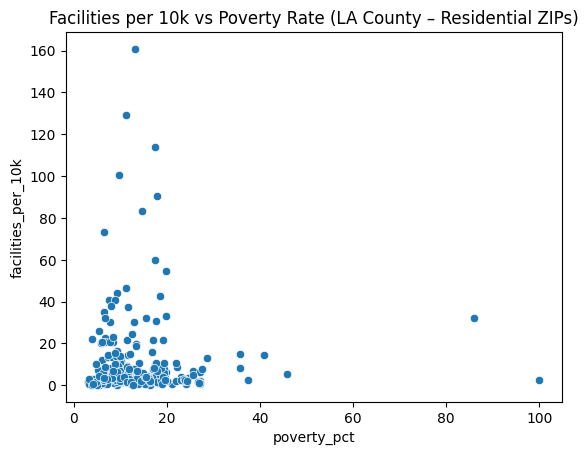

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=final,
    x="poverty_pct",
    y="facilities_per_10k"
)
plt.title("Facilities per 10k vs Poverty Rate (LA County – Residential ZIPs)")
plt.show()


In [256]:
final.sort_values("facilities_per_10k", ascending=False).head(10)
final_clean = final[
    (final["population"] > 5000) & 
    (final["facilities_per_10k"] < 50)
].copy()

print(final.shape)
print(final_clean.shape)


(268, 6)
(252, 6)


In [257]:
final_clean[["facilities_per_10k","poverty_pct","median_income"]].corr()


,facilities_per_10k,poverty_pct,median_income
facilities_per_10k,1.000000,-0.066341,0.012207
poverty_pct,-0.066341,1.000000,-0.780753
median_income,0.012207,-0.780753,1.000000


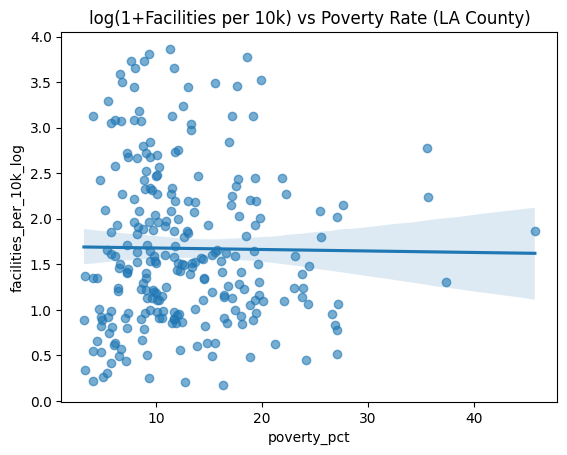

In [258]:
import numpy as np

final_clean["facilities_per_10k_log"] = np.log1p(final_clean["facilities_per_10k"])

sns.regplot(
    data=final_clean,
    x="poverty_pct",
    y="facilities_per_10k_log",
    scatter_kws={"alpha":0.6}
)
plt.title("log(1+Facilities per 10k) vs Poverty Rate (LA County)")
plt.show()


In [259]:
final_clean.columns.tolist()

['zcta',
 'facility_count',
 'poverty_pct',
 'median_income',
 'population',
 'facilities_per_10k',
 'facilities_per_10k_log']

In [260]:
final_clean.shape
final_clean.head()

,zcta,facility_count,poverty_pct,median_income,population,facilities_per_10k,facilities_per_10k_log
0,90001,5,21.206320,57698,57652,0.867273,0.624479
1,90002,3,24.143420,54221,53108,0.564887,0.447813
2,90003,5,27.063850,51275,75024,0.666453,0.510698
3,90004,12,19.336932,58420,58833,2.039672,1.111749
4,90005,8,23.806469,49226,37754,2.118981,1.137506


In [261]:
final_clean.shape
final_clean.head()

,zcta,facility_count,poverty_pct,median_income,population,facilities_per_10k,facilities_per_10k_log
0,90001,5,21.206320,57698,57652,0.867273,0.624479
1,90002,3,24.143420,54221,53108,0.564887,0.447813
2,90003,5,27.063850,51275,75024,0.666453,0.510698
3,90004,12,19.336932,58420,58833,2.039672,1.111749
4,90005,8,23.806469,49226,37754,2.118981,1.137506


In [262]:
import pandas as pd

disp = pd.read_csv("disposition_pddmasked.csv")
disp.head()

,patcnty1,dsch_yr,disp1,Discharges,AnnotationCode,AnnotationDesc
0,Alameda,2012,Acute Care at another hospital,3031.0,NaN,NaN
1,Alameda,2012,Acute Care within the admitting hospital,325.0,NaN,NaN
2,Alameda,2012,Died,2907.0,NaN,NaN
3,Alameda,2012,Home Health Service,14623.0,NaN,NaN
4,Alameda,2012,Invalid,3.0,NaN,NaN


In [263]:
disp.columns.tolist()

['patcnty1',
 'dsch_yr',
 'disp1',
 'Discharges',
 'AnnotationCode',
 'AnnotationDesc']

In [264]:
la_disp = disp[disp["patcnty1"] == "Los Angeles"].copy()
la_disp.head()

,patcnty1,dsch_yr,disp1,Discharges,AnnotationCode,AnnotationDesc
3248,Los Angeles,2012,Acute Care at another hospital,22709.0,NaN,NaN
3249,Los Angeles,2012,Acute Care within the admitting hospital,3119.0,NaN,NaN
3250,Los Angeles,2012,Died,20525.0,NaN,NaN
3251,Los Angeles,2012,Home Health Service,89460.0,NaN,NaN
3252,Los Angeles,2012,Invalid,73.0,NaN,NaN


In [265]:
la_disp["disp1"].unique()

array(['Acute Care at another hospital',
       'Acute Care within the admitting hospital', 'Died',
       'Home Health Service', 'Invalid', 'Left Against Medical Advice',
       'Other', 'Other Care (not SN/IC) at another hospital',
       'Other Care with the admitting hospital', 'Prison/Jail',
       'Residential Care facility', 'Routine (Home)',
       'Skilled Nursing/Intermediate Care (SN/IC) with the admitting hospital',
       'SN/IC at another facility', 'Acute Care', 'Childrens_or_Cancer',
       'Critical Access Hospital', 'Disaster_Care_Site', 'Hospice_Care',
       'Invalid or Blank', 'Not_Defined_Elsewhere', 'Psychiatric_Care',
       'Rehab', 'Skilled Nursing/Intermediate Care (SN/IC)'], dtype=object)

In [266]:
totals = (
    la_disp
    .groupby("dsch_yr")["Discharges"]
    .sum()
    .reset_index()
    .rename(columns={"Discharges": "total_discharges"})
)

totals.head()

,dsch_yr,total_discharges
0,2012,1089226.0
1,2013,1051546.0
2,2014,1050239.0
3,2015,1051609.0
4,2016,1049510.0


In [267]:
key_outcomes = la_disp[
    la_disp["disp1"].isin(["Routine (Home)", "Home Health Service", "Died"])
]

summary = (
    key_outcomes
    .groupby(["dsch_yr", "disp1"])["Discharges"]
    .sum()
    .reset_index()
)

summary.head()

,dsch_yr,disp1,Discharges
0,2012,Died,20525.0
1,2012,Home Health Service,89460.0
2,2012,Routine (Home),799687.0
3,2013,Died,20447.0
4,2013,Home Health Service,89418.0


In [268]:
pivot = summary.pivot(
    index="dsch_yr",
    columns="disp1",
    values="Discharges"
).reset_index()

pivot.head()

disp1,dsch_yr,Died,Home Health Service,Routine (Home)
0,2012,20525.0,89460.0,799687.0
1,2013,20447.0,89418.0,765307.0
2,2014,19788.0,91849.0,762371.0
3,2015,20794.0,93100.0,750517.0
4,2016,21530.0,98071.0,741385.0


In [269]:
pivot = pivot.merge(totals, on="dsch_yr")

pivot.head()

,dsch_yr,Died,Home Health Service,Routine (Home),total_discharges
0,2012,20525.0,89460.0,799687.0,1089226.0
1,2013,20447.0,89418.0,765307.0,1051546.0
2,2014,19788.0,91849.0,762371.0,1050239.0
3,2015,20794.0,93100.0,750517.0,1051609.0
4,2016,21530.0,98071.0,741385.0,1049510.0


In [270]:
pivot["pct_home"] = (
    (pivot["Routine (Home)"] + pivot["Home Health Service"])
    / pivot["total_discharges"]
)

pivot["pct_died"] = pivot["Died"] / pivot["total_discharges"]

pivot.head()

,dsch_yr,Died,Home Health Service,Routine (Home),total_discharges,pct_home,pct_died
0,2012,20525.0,89460.0,799687.0,1089226.0,0.816311,0.018844
1,2013,20447.0,89418.0,765307.0,1051546.0,0.812827,0.019445
2,2014,19788.0,91849.0,762371.0,1050239.0,0.813358,0.018841
3,2015,20794.0,93100.0,750517.0,1051609.0,0.802215,0.019774
4,2016,21530.0,98071.0,741385.0,1049510.0,0.799855,0.020514


In [271]:
disp.columns

Index(['patcnty1', 'dsch_yr', 'disp1', 'Discharges', 'AnnotationCode',
       'AnnotationDesc'],
      dtype='object')

In [272]:
import pandas as pd

key = disp[disp["disp1"].isin(["Routine (Home)", "Home Health Service", "Died"])].copy()

totals = (
    disp.groupby(["patcnty1", "dsch_yr"])["Discharges"]
    .sum()
    .reset_index(name="total_discharges")
)

summary = (
    key.groupby(["patcnty1", "dsch_yr", "disp1"])["Discharges"]
    .sum()
    .reset_index()
)

pivot = (
    summary.pivot_table(index=["patcnty1", "dsch_yr"], columns="disp1", values="Discharges", fill_value=0)
    .reset_index()
)

pivot = pivot.merge(totals, on=["patcnty1", "dsch_yr"], how="left")

pivot["pct_home"] = (pivot.get("Routine (Home)", 0) + pivot.get("Home Health Service", 0)) / pivot["total_discharges"]
pivot["pct_died"] = pivot.get("Died", 0) / pivot["total_discharges"]

pivot.head()

,patcnty1,dsch_yr,Died,Home Health Service,Routine (Home),total_discharges,pct_home,pct_died
0,Alameda,2012,2907,14623,103683,145447.0,0.813396,0.019987
1,Alameda,2013,2920,13541,99675,139760.0,0.810074,0.020893
2,Alameda,2014,2823,14985,97055,137584.0,0.814339,0.020518
3,Alameda,2015,2771,16810,93867,136952.0,0.808144,0.020233
4,Alameda,2016,2822,17856,92947,137586.0,0.805336,0.020511


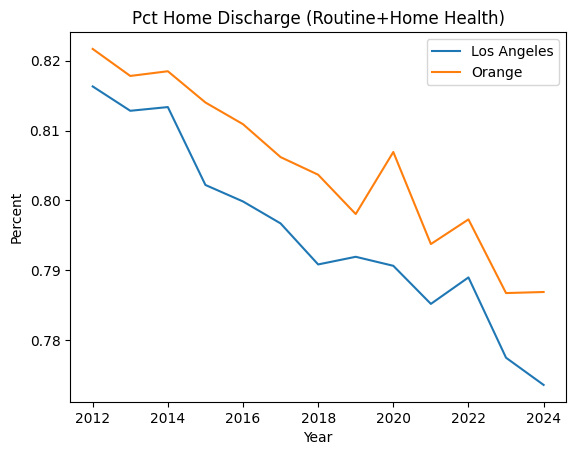

In [273]:
import matplotlib.pyplot as plt

la = pivot[pivot["patcnty1"] == "Los Angeles"].sort_values("dsch_yr")
oc = pivot[pivot["patcnty1"] == "Orange"].sort_values("dsch_yr")

plt.plot(la["dsch_yr"], la["pct_home"], label="Los Angeles")
plt.plot(oc["dsch_yr"], oc["pct_home"], label="Orange")
plt.title("Pct Home Discharge (Routine+Home Health)")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.legend()
plt.show()


In [274]:
import pandas as pd
import requests

url = "https://api.census.gov/data/2022/acs/acs5/subject?get=NAME,S1701_C03_001E,S1901_C01_012E&for=county:*&in=state:06"

response = requests.get(url)
data = response.json()

county_data = pd.DataFrame(data[1:], columns=data[0])

county_data = county_data.rename(columns={
    "S1701_C03_001E": "poverty_rate",
    "S1901_C01_012E": "median_income"
})

county_data["county"] = county_data["NAME"].str.replace(" County, California", "", regex=False)

county_data["poverty_rate"] = pd.to_numeric(county_data["poverty_rate"], errors="coerce")
county_data["median_income"] = pd.to_numeric(county_data["median_income"], errors="coerce")

county_data.head()


,NAME,poverty_rate,median_income,state,county
0,"Alameda County, California",9.2,122488,06,Alameda
1,"Alpine County, California",13.7,101125,06,Alpine
2,"Amador County, California",7.8,74853,06,Amador
3,"Butte County, California",18.2,66085,06,Butte
4,"Calaveras County, California",13.1,77526,06,Calaveras


In [275]:
pivot = pivot.merge(
    county_data[["county", "poverty_rate", "median_income"]],
    left_on="patcnty1",
    right_on="county",
    how="left"
)

pivot.head()


,patcnty1,dsch_yr,Died,Home Health Service,Routine (Home),total_discharges,pct_home,pct_died,county,poverty_rate,median_income
0,Alameda,2012,2907,14623,103683,145447.0,0.813396,0.019987,Alameda,9.2,122488.0
1,Alameda,2013,2920,13541,99675,139760.0,0.810074,0.020893,Alameda,9.2,122488.0
2,Alameda,2014,2823,14985,97055,137584.0,0.814339,0.020518,Alameda,9.2,122488.0
3,Alameda,2015,2771,16810,93867,136952.0,0.808144,0.020233,Alameda,9.2,122488.0
4,Alameda,2016,2822,17856,92947,137586.0,0.805336,0.020511,Alameda,9.2,122488.0


In [276]:
pivot[["pct_home", "pct_died", "poverty_rate", "median_income"]].corr()


,pct_home,pct_died,poverty_rate,median_income
pct_home,1.000000,-0.594671,-0.031603,0.215017
pct_died,-0.594671,1.000000,0.207684,-0.301989
poverty_rate,-0.031603,0.207684,1.000000,-0.764662
median_income,0.215017,-0.301989,-0.764662,1.000000


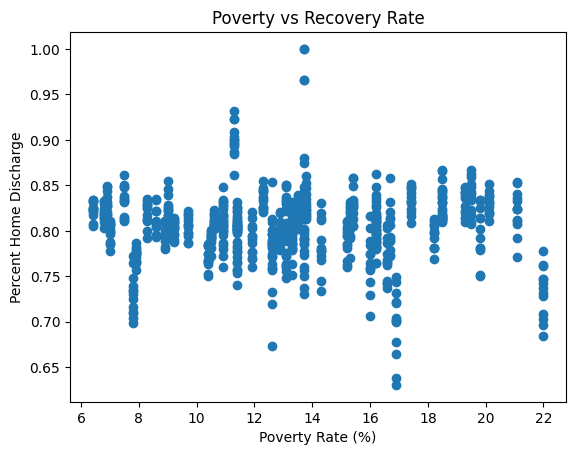

In [277]:
import matplotlib.pyplot as plt

plt.scatter(pivot["poverty_rate"], pivot["pct_home"])
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Percent Home Discharge")
plt.title("Poverty vs Recovery Rate")
plt.show()


In [278]:
county_avg = pivot.groupby("patcnty1")[["pct_home", "pct_died"]].mean().reset_index()

county_avg = county_avg.merge(
    county_data[["county", "poverty_rate", "median_income"]],
    left_on="patcnty1",
    right_on="county",
    how="left"
)

county_avg.head()


,patcnty1,pct_home,pct_died,county,poverty_rate,median_income
0,Alameda,0.803197,0.022713,Alameda,9.2,122488.0
1,Alpine,0.849188,0.012791,Alpine,13.7,101125.0
2,Amador,0.729915,0.024795,Amador,7.8,74853.0
3,Butte,0.795492,0.020237,Butte,18.2,66085.0
4,Calaveras,0.773568,0.027045,Calaveras,13.1,77526.0


In [279]:
county_avg[["pct_home", "pct_died", "poverty_rate", "median_income"]].corr()


,pct_home,pct_died,poverty_rate,median_income
pct_home,1.000000,-0.741724,-0.038647,0.262940
pct_died,-0.741724,1.000000,0.270924,-0.393945
poverty_rate,-0.038647,0.270924,1.000000,-0.764662
median_income,0.262940,-0.393945,-0.764662,1.000000


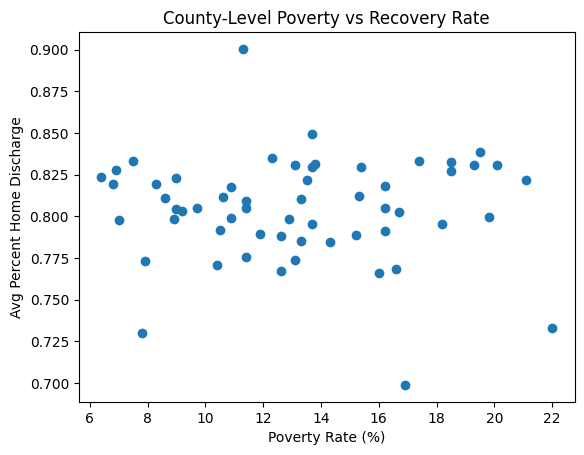

In [280]:
plt.scatter(county_avg["poverty_rate"], county_avg["pct_home"])
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Avg Percent Home Discharge")
plt.title("County-Level Poverty vs Recovery Rate")
plt.show()


In [281]:
%pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [282]:

reg_df = county_avg[["poverty_rate", "pct_home"]].dropna()

X = reg_df["poverty_rate"]
X = sm.add_constant(X)

y = reg_df["pct_home"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               pct_home   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.08377
Date:                Fri, 06 Feb 2026   Prob (F-statistic):              0.773
Time:                        23:55:00   Log-Likelihood:                 119.43
No. Observations:                  58   AIC:                            -234.9
Df Residuals:                      56   BIC:                            -230.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8085      0.014     56.855   

In [283]:
reg_df = final[["facilities_per_10k", "poverty_pct", "median_income"]].dropna()

X = reg_df[["poverty_pct", "median_income"]]
X = sm.add_constant(X)

y = reg_df["facilities_per_10k"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     facilities_per_10k   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     11.83
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           1.21e-05
Time:                        23:55:00   Log-Likelihood:                -1157.9
No. Observations:                 267   AIC:                             2322.
Df Residuals:                     264   BIC:                             2333.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.5687      2.188      6.660

In [284]:
import numpy as np
import statsmodels.api as sm

df1 = final[["facilities_per_10k", "poverty_pct"]].copy()

df1["facilities_per_10k"] = pd.to_numeric(df1["facilities_per_10k"], errors="coerce")
df1["poverty_pct"] = pd.to_numeric(df1["poverty_pct"], errors="coerce")

df1 = df1.replace([np.inf, -np.inf], np.nan).dropna()

print("Rows left:", df1.shape)

X1 = sm.add_constant(df1["poverty_pct"])
y1 = df1["facilities_per_10k"]

model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

Rows left: (267, 2)
                            OLS Regression Results                            
Dep. Variable:     facilities_per_10k   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.07895
Date:                Fri, 06 Feb 2026   Prob (F-statistic):              0.779
Time:                        23:55:00   Log-Likelihood:                -1169.3
No. Observations:                 267   AIC:                             2343.
Df Residuals:                     265   BIC:                             2350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.8274      2.

In [285]:
df2 = final[["facilities_per_10k", "median_income"]].copy()
df2["facilities_per_10k"] = pd.to_numeric(df2["facilities_per_10k"], errors="coerce")
df2["median_income"] = pd.to_numeric(df2["median_income"], errors="coerce")
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna()

X2 = sm.add_constant(df2["median_income"])
y2 = df2["facilities_per_10k"]

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     facilities_per_10k   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     16.75
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           5.67e-05
Time:                        23:55:00   Log-Likelihood:                -1161.2
No. Observations:                 267   AIC:                             2326.
Df Residuals:                     265   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.7976      1.157      8.469

In [286]:
final[["population", "facility_count", "facilities_per_10k", "poverty_pct"]].isna().mean()


population            0.000000
facility_count        0.000000
facilities_per_10k    0.000000
poverty_pct           0.003731
dtype: float64

In [287]:
final["log_facilities"] = np.log1p(final["facilities_per_10k"])

X = sm.add_constant(final[["poverty_pct"]].dropna())
y = final.loc[X.index, "log_facilities"]

model_log = sm.OLS(y, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_facilities   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6003
Date:                Fri, 06 Feb 2026   Prob (F-statistic):              0.439
Time:                        23:55:00   Log-Likelihood:                -377.20
No. Observations:                 267   AIC:                             758.4
Df Residuals:                     265   BIC:                             765.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7249      0.105     16.436      

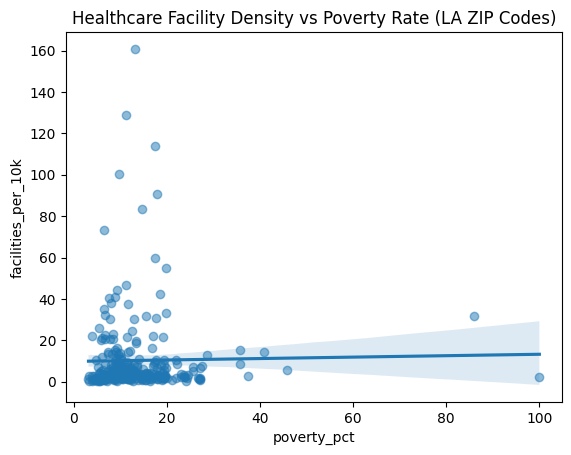

In [288]:
sns.regplot(
    data=final,
    x="poverty_pct",
    y="facilities_per_10k",
    scatter_kws={"alpha":0.5}
)
plt.title("Healthcare Facility Density vs Poverty Rate (LA ZIP Codes)")
plt.show()

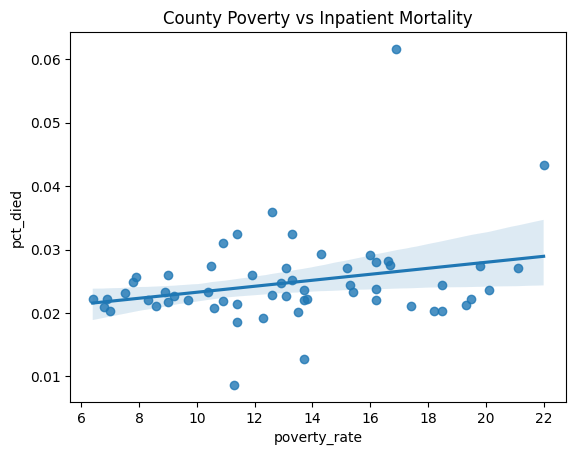

In [289]:
sns.regplot(
    data=county_avg,
    x="poverty_rate",
    y="pct_died"
)
plt.title("County Poverty vs Inpatient Mortality")
plt.show()

In [290]:
# This analysis suggests that socioeconomic gradients are more visible in inpatient mortality than in healthcare facility density at the ZIP level, indicating that outcome disparities may persist even when facility counts appear evenly distributed.
